In [16]:
import os
import sys
import numpy as np
import pandas as pd
from mytools import io_data


module_path = os.path.abspath(os.path.join('./mytools/io_data.py'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
table_train = io_data.make_table("./dataTrainComplete")
table_test = io_data.make_table("./dataPublicComplete")
table_private = io_data.make_table("./dataPrivateComplete")

key_chem = pd.read_excel("./Keywords_2/02chem.list.xlsx", header=None, index_col=False)
key_crop = pd.read_excel("./Keywords_2/02crop.list.xlsx", header=None, index_col=False)
key_pest = pd.read_excel("./Keywords_2/02pest.list.xlsx", header=None, index_col=False)


def make_key_lists(df):
    output = []
    num_cols = df.shape[1]
    for ind, row in df.iterrows():
        temp = [x for x in list(row) if pd.isnull(x) == False]
        temp.sort(key=len, reverse=True)
        output.append(temp)
    output = sorted(output, key=lambda x: len(x[0]), reverse=True)
    return output


list_chem = make_key_lists(key_chem)
list_crop = make_key_lists(key_crop)
list_pest = make_key_lists(key_pest)
list_temp = list_chem + list_crop + list_pest

# list_temp = list_crop + list_pest
list_all_keywords = []
for kw in list_temp:
    temp = list(filter(lambda val: val != ' ', kw))
    list_all_keywords.append(temp)
list_all_keywords = sorted(list_all_keywords, key=lambda x: len(x[0]), reverse=True)

In [17]:
len(list_all_keywords)

764

In [18]:
import pickle


kw_dict = {}
for kw in list_all_keywords:
    # kw_dict[kw[-1]] = len(kw[-1])
    kw_dict[kw[0]] = len(kw[0])
    
with open('kw_dict_norm_longest.pickle', 'wb') as handle:
    pickle.dump(kw_dict, handle, protocol = pickle.HIGHEST_PROTOCOL)    

In [19]:
kw_dict['太平洋臀紋粉介殼蟲']

9

In [20]:
table_private

,ID,title,text,notice
0,708,小黃薊馬密度高，台南農改場籲加強防治、確保果實品質\n,台南區主要水果如芒果及文旦等正值幼果期，此時果實易受小黃薊馬危害，經調查目前多數芒果園及文旦...,\n
1,883,寒流來襲，各類作物應加強寒害防範措施\n,依據中央氣象局預報指出，因受強烈大陸冷氣團籠罩，各地早晚氣溫明顯偏低，由於高接梨目前漸入嫁接...,\n
2,837,水稻秧苗期，慎防水象鼻蟲為害\n,行政院農業委員會花蓮區農業改良場表示，目前花蓮地區正值水稻秧苗時期，亦為水稻水象鼻蟲越冬成蟲...,\n
3,1359,發佈水稻紋枯病及白葉枯病警報\n,高屏地區水稻紋枯病發生警報請農友注意防治水稻紋枯病及白葉枯病增進水稻產量及品質高屏地區二期水...,\n
4,323,氣候多變溫差大溼度高，台南場籲慎防水稻葉稻熱病\n,近日氣溫回升，夜間霧氣籠罩，雲嘉南地區水稻將陸續進入分蘗盛期，但受鋒面影響，導致溫度高低起伏...,如發現稻熱病發生，應停施氮肥，並立即引水灌溉，因灌溉水中有多量的矽酸，水稻吸收後可增加對稻熱...
...,...,...,...,...
415,316,氣候炎熱小心紅蜘蛛，請農友注意番荔枝葉螨防治。臺東區農改場、防檢局及田邊好幫手關心您。\n,夏季氣候乾燥炎熱，行政院農業委員會臺東區農業改良場（以下簡稱臺東場）監測轄區番荔枝果園，發現...,為防範葉螨類為害番荔枝，臺東場建議採行下列方法：一、耕作防治：（一）利用噴藥車或噴灌設備定期...
416,99,發布本(106)年第一期作水稻葉稻熱病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。\n,依據本場研究人員巡迴調查水稻疫情結果，轄區內部分地區已發生水稻葉稻熱病，且近期氣候符合發病條...,一、預警區域：本場輔導轄區各鄉鎮市水稻栽培區。二、防治注意事項：（1）不可過度施用氮肥，以免...
417,1223,琉璃蟻數量增加，民眾應留意及適時防治。雲林防疫所、防檢局及田邊好幫手關心您。\n,近年琉璃蟻數量增加，時常侵入居家環境及農田，造成民眾生活與農事作業困擾，若情況嚴重，可使用環...,田間發生時，由於琉璃蟻會取食植物或半翅目昆蟲分泌的蜜露，常與介殼蟲或蚜蟲共生，因未直接危害農...
418,1397,水稻陸續抽穗，籲請農友注意防治穗稻熱病、紋枯病及螟蟲。雲林縣政府、防檢局及田邊好幫手關心您。\n,雲林地區水稻陸續進入抽穗期，田間水稻葉片仍有發現葉稻熱病病斑，加上近期鋒面降雨接續來襲，濕度...,化學防治請選用核准登記及推薦水稻使用之藥劑，藥劑種類可參考臺南區農業改良場網站連結各項作物的...


## keywords unification

In [21]:
def replace(df, cont_name):
    output = []
    for _, row in df.iterrows():
        ind = row.ID
        text = ''
        text_new = ''
        if cont_name=='both':
            text = row['title'] + row['text']
        elif cont_name=='title':
            text = row[cont_name]
            
        for list_kw in list_all_keywords:
            # for kw in list_kw[:-1]:
            for kw in list_kw[1:]:
                if kw in text:
                    # text = text.replace(kw, list_kw[-1])
                    text = text.replace(kw, list_kw[0])
                    break
        output.append([ind, text])
    df_new = pd.DataFrame(output, columns = ['ID', 'text'])
    return df_new


# table_train = replace(table_train, 'both')
# table_test = replace(table_test, 'both')
table_private = replace(table_private, 'both')

丁基加保扶可濕性粉劑
加保扶水懸劑稀釋
賽洛寧膠囊懸著劑
可尼丁水溶性粒劑
賽速安水溶性粒劑
亞滅培水溶性粉劑
益達胺水懸劑
麻豆文旦
檬果
中國梨
加保扶水懸劑稀釋
培丹水溶性粉劑
陶斯松乳劑或水基乳劑
鏈四環黴素水溶性粉劑
待克利水分散性粒劑
三賽唑可濕性粉劑
克枯爛可濕性粉劑
賓克隆可濕性粉劑
毆殺松水溶性粉劑
鐵甲砷酸銨溶液
得克利水基乳劑
賓得克利水懸劑
福多寧水懸劑
撲殺熱藥劑
陶斯松乳劑或水基乳劑
丁基加保扶可濕性粉劑
加保扶水懸劑稀釋
芬諾克可濕性粉劑
佈飛賽滅寧乳劑
麻豆文旦
柳橙
細菌性黑斑病
黑腳煙仔
浮塵子
檬果
丁基加保扶可濕性粉劑
加保扶水懸劑稀釋
培丹水溶性粉劑
稻縱捲葉蟲
茭白筍
桃子
甘蔗
嘉賜貝芬混合可濕性粉劑
保米熱必斯可濕性粉劑
三賽唑可濕性粉劑
熱必斯可濕性粉劑
穗稻熱病
加保利可濕性粉劑可濕性粉劑
陶斯松乳劑或水基乳劑
蘇力菌水分散性粒劑
加保扶水懸劑稀釋
賽洛寧膠囊懸著劑
納乃得水溶性粒劑
百滅寧可濕性粉劑
費洛蒙緩釋劑
畢芬寧水懸劑
美文松溶液
斜紋夜盜蟲
青蔥
桃子
賽洛寧膠囊懸著劑
亞滅培水溶性粉劑
玉荷包荔枝
台灣欒樹
三賽唑可濕性粉劑
加普胺水懸劑
穗稻熱病
含毒甲基丁香油
晚崙西亞橙
桃子
檬果
穗稻熱病
納乃得水溶性粒劑
芬殺松乳劑稀釋
含毒甲基丁香油
芬殺蜱水懸劑
蛋白質水解物
福木松乳劑
晚崙西亞橙
麻豆文旦
麻豆文旦
嘉賜三賽唑可濕性粉劑
護粒三賽唑可濕性粉劑
三賽唑可濕性粉劑
熱必斯可濕性粉劑
加普胺水懸劑
撲殺熱藥劑
玉荷包荔枝
細菌性黑斑病
青蔥
鋅錳滅達樂可濕性粉劑
鋅錳乃浦可濕性粉劑
貝芬硫可濕性粉劑
腈硫醌可濕性粉劑
錳乃浦可濕性粉劑
亞磷酸稀釋液
褐腐病
馬拉松可濕性粉劑
三氯松可溶性粉劑
芬殺松乳劑稀釋
含毒甲基丁香油
芬殺蜱水懸劑
玉荷包荔枝
晚崙西亞橙
桃子
邁克尼可濕性粉劑
菲克利水懸劑
三泰隆乳劑
平克座乳劑
鏈四環黴素水溶性粉劑
克枯爛可濕性粉劑
撲殺熱藥劑
橙蜜香番茄
柿子
玉荷包荔枝
檬果
檬果
克熱淨可濕性粉劑1500倍
賽普待克利水分散性粒劑
待克利水分散性粒劑
克收欣水分散性粒劑
賽普洛水分散性粒劑
芬瑞莫可濕性粉劑
達克利可濕性粉劑
普得松可濕性粉劑
得克利水基乳劑
四克利水基乳
快諾芬水懸劑
平克座乳劑
依滅列乳劑
嘉賜三賽唑可濕性粉劑
三賽唑可濕性粉劑
加普胺

In [22]:
table_private.tail(3)

,ID,text
417,1223,臺灣本土黑螞蟻數量增加，民眾應留意及適時防治。雲林防疫所、防檢局及田邊好幫手關心您。\n近年...
418,1397,水稻陸續抽穗，籲請農友注意防治穗稻熱病、紋枯病及螟蟲。雲林縣政府、防檢局及田邊好幫手關心您。...
419,1171,發佈九十二∕九十三年度各蕉區葉部病害第二次防治情報\n說明：一、請繼續宣導蕉農社員進行中株期...


In [23]:
# table_train.to_pickle("./table_train_replaced.pkl")
# table_test.to_pickle("./table_test_replaced.pkl")
table_private.to_pickle("./table_private_replaced.pkl")

## create new keywords

## identify keywords

In [48]:
from mytools import io_data

art_keywords = []
for _, row in table_train.iterrows():
    keywords = []
    for list_kw in list_all_keywords:
        if list_kw[-1] in row.text:
            keywords.append(list_kw[-1])
    # print (keywords)
    art_keywords.append(keywords)
    
table_train['keywords'] = art_keywords

In [49]:
data_train = io_data.make_data('train', table_train)
# data_train = data_train[['text_a', 'text_b', 'label']]

In [50]:
data_train.tail(5)

,id_text_a,text_a,kw_text_a,id_text_b,text_b,kw_text_b,label
311917,585,臺東縣水稻一期作請注意防治跳仔、穗苔及吊狗，以確保稻穀產量與品質\n農委會臺東區農業改良場呼...,"[三賽唑, 加保扶, 佈芬淨, 可尼丁, 賽速安, 加普, 黑條萎縮病, 吊狗, 跳仔, 跳...",113,水稻害蟲密度逐漸升高，高雄場籲請農友注意防範。\n葉尾蟲及跳仔同為長距離遷移性害蟲，在台灣可...,"[葉尾蟲, 煤污病, 跳仔, 跳仔, 水稻, 玉米, 雜草]",unlike
311918,585,臺東縣水稻一期作請注意防治跳仔、穗苔及吊狗，以確保稻穀產量與品質\n農委會臺東區農業改良場呼...,"[三賽唑, 加保扶, 佈芬淨, 可尼丁, 賽速安, 加普, 黑條萎縮病, 吊狗, 跳仔, 跳...",1167,氣溫日降，臺南農改場籲加強防治番茄及馬鈴薯黑骨以減少損害\n近日低溫，雖然雨量不多，但晨霧或...,"[番茄, 黑骨, 馬鈴薯]",unlike
311919,585,臺東縣水稻一期作請注意防治跳仔、穗苔及吊狗，以確保稻穀產量與品質\n農委會臺東區農業改良場呼...,"[三賽唑, 加保扶, 佈芬淨, 可尼丁, 賽速安, 加普, 黑條萎縮病, 吊狗, 跳仔, 跳...",95,發布本(104)年度第二期作水稻白葉枯病發生預報。桃園區農改場、防檢局及田邊好幫手關心您。\...,"[白葉枯病, 水稻, 桃]",unlike
311920,585,臺東縣水稻一期作請注意防治跳仔、穗苔及吊狗，以確保稻穀產量與品質\n農委會臺東區農業改良場呼...,"[三賽唑, 加保扶, 佈芬淨, 可尼丁, 賽速安, 加普, 黑條萎縮病, 吊狗, 跳仔, 跳...",616,水稻分蘗盛期籲請農友做好水稻臭腳銅及白葉枯病防治工作\n水稻分蘗盛期籲請農友做好水稻臭腳銅及...,"[鏈四環素, 克枯爛, 賓克隆, 褔多寧, 維利黴素, 撲殺熱, 白葉枯病, 臭腳銅, 水稻]",unlike
311921,585,臺東縣水稻一期作請注意防治跳仔、穗苔及吊狗，以確保稻穀產量與品質\n農委會臺東區農業改良場呼...,"[三賽唑, 加保扶, 佈芬淨, 可尼丁, 賽速安, 加普, 黑條萎縮病, 吊狗, 跳仔, 跳...",152,豪雨過後，高雄場籲請農友注意洋蔥軟腐病與黃萎病之防治工作。高雄區農改場，防檢局及田邊好幫手關...,"[軟腐病, 黃萎病, 蔥, 洋蔥]",unlike


## keywords in common

In [51]:
common_keywords = []
count=0
for _, row in data_train.iterrows():
    inter = set(row.kw_text_a).intersection(row.kw_text_b)
    if len(inter) != 0:
        # print (row.label, inter)
        count+=1
    common_keywords.append(list(inter))
    
data_train['same_kw']=common_keywords

In [52]:
data_train.loc[data_train['label']=='like'].tail(3)

,id_text_a,text_a,kw_text_a,id_text_b,text_b,kw_text_b,label,same_kw
310359,616,水稻分蘗盛期籲請農友做好水稻臭腳銅及白葉枯病防治工作\n水稻分蘗盛期籲請農友做好水稻臭腳銅及...,"[鏈四環素, 克枯爛, 賓克隆, 褔多寧, 維利黴素, 撲殺熱, 白葉枯病, 臭腳銅, 水稻]",646,連日豪雨或雷雨，台南農改場籲請農友做好水稻臭腳銅及白葉枯病防治工作 \n『連日豪雨或雷雨，台...,"[鏈四環素, 克枯爛, 賓克隆, 褔多寧, 維利黴素, 撲殺熱, 白葉枯病, 臭腳銅, 水稻]",like,"[賓克隆, 鏈四環素, 克枯爛, 臭腳銅, 水稻, 褔多寧, 維利黴素, 撲殺熱, 白葉枯病]"
310458,616,水稻分蘗盛期籲請農友做好水稻臭腳銅及白葉枯病防治工作\n水稻分蘗盛期籲請農友做好水稻臭腳銅及...,"[鏈四環素, 克枯爛, 賓克隆, 褔多寧, 維利黴素, 撲殺熱, 白葉枯病, 臭腳銅, 水稻]",835,花蓮區作物病蟲害疫情警報第4號\n花蓮區作物病蟲害疫情警報第4號92年4月24日發佈Δ水稻葉...,"[嘉賜三賽唑, 保米熱斯, 鏈四環素, 富米熱斯, 待克利, 保米黴素, 三賽唑, 亞賜圃,...",like,"[賓克隆, 鏈四環素, 克枯爛, 臭腳銅, 水稻, 褔多寧, 維利黴素, 撲殺熱, 白葉枯病]"
310600,616,水稻分蘗盛期籲請農友做好水稻臭腳銅及白葉枯病防治工作\n水稻分蘗盛期籲請農友做好水稻臭腳銅及...,"[鏈四環素, 克枯爛, 賓克隆, 褔多寧, 維利黴素, 撲殺熱, 白葉枯病, 臭腳銅, 水稻]",1119,台中區農業改良場籲請農民掌握時機，防治水稻吊狗及白葉枯病\n水稻即將進入抽穗期，氣候陰晴不定...,"[嘉賜三賽唑, 鏈四環素, 克熱賜圃, 三賽唑, 克枯爛, 賓克隆, 加普, 褔多寧, 菲克...",like,"[賓克隆, 鏈四環素, 克枯爛, 臭腳銅, 水稻, 褔多寧, 維利黴素, 撲殺熱, 白葉枯病]"


## stastistics

In [53]:
print ('{} pairs of articles have at least one keyword in common'.format(count))
print ('which is {}% of the pairs'.format(round(count/data_train.shape[0]*100, 2)))

81824 pairs of articles have at least one keyword in common
which is 26.23% of the pairs


In [54]:
com_num_like = {}
com_num_unlike = {}

for _, row in data_train.iterrows():
    com_len = len(row.same_kw)
    if row.label=='unlike':
        if com_len not in com_num_unlike:
            com_num_unlike[com_len] = 0
        com_num_unlike[com_len] += 1
    else:
        if com_len not in com_num_like:
            com_num_like[com_len] = 0
        com_num_like[com_len] += 1
        
# com_num_like = dict(filter(lambda elem: elem[0] <= 10, com_num_like.items()))
# com_num_unlike = dict(filter(lambda elem: elem[0] <= 10, com_num_unlike.items()))

In [55]:
import plotly.express as px

like_stat = pd.DataFrame(list(com_num_like.items()),
                   columns=['number of keywords in commen', 'number of article pairs'])

fig = px.bar(like_stat, x='number of keywords in commen', y='number of article pairs',\
             title="When text_a refer to text_b", width=400, height=400)
fig.show()

In [56]:
unlike_stat = pd.DataFrame(list(com_num_unlike.items()),
                   columns=['number of keywords in commen', 'number of article pairs'])

fig = px.bar(unlike_stat, x='number of keywords in commen', y='number of article pairs',\
             title="When text_a DOESN'T refer to text_b", width=400, height=400)
fig.show()

## evaluate the method

In [57]:
# threshold = 3
precisions = []
recalls = []
fs = []
for i in range(1, 6):
    threshold = i
    
    # 實際yes 預測yes
    TP = like_stat.loc[like_stat['number of keywords in commen']>=threshold]['number of article pairs'].sum()
    # 實際no 預測no
    TN = unlike_stat.loc[unlike_stat['number of keywords in commen']<threshold]['number of article pairs'].sum()
    # 實際no 預測yes
    FP = unlike_stat.loc[unlike_stat['number of keywords in commen']>=threshold]['number of article pairs'].sum()
    # 實際yes 預測no
    FN = like_stat.loc[like_stat['number of keywords in commen']<threshold]['number of article pairs'].sum()


    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1 = 2 / (1/precision + 1/recall)
    precisions.append(precision)
    recalls.append(recall)
    fs.append(f1)

    
    print ('Regarding pairs with {} keywords in common as related:'.format(threshold))
    print ('precision:', round(precision, 3))
    print ('recall:', round(recall, 3))
    print ('f1-score:', round(f1, 3))
    cf_matrix = pd.DataFrame([[TP, FP], [FN, TN]], ['predicted_yes', 'predicted_no'], ['actual_yes', 'actual_no'])
    print (cf_matrix)

Regarding pairs with 1 keywords in common as related:
precision: 0.017
recall: 0.984
f1-score: 0.033
               actual_yes  actual_no
predicted_yes        1359      80465
predicted_no           22     230076
Regarding pairs with 2 keywords in common as related:
precision: 0.042
recall: 0.924
f1-score: 0.08
               actual_yes  actual_no
predicted_yes        1276      29126
predicted_no          105     281415
Regarding pairs with 3 keywords in common as related:
precision: 0.082
recall: 0.598
f1-score: 0.144
               actual_yes  actual_no
predicted_yes         826       9254
predicted_no          555     301287
Regarding pairs with 4 keywords in common as related:
precision: 0.111
recall: 0.374
f1-score: 0.172
               actual_yes  actual_no
predicted_yes         517       4125
predicted_no          864     306416
Regarding pairs with 5 keywords in common as related:
precision: 0.128
recall: 0.24
f1-score: 0.167
               actual_yes  actual_no
predicted_yes   

Text(0.5, 1.0, 'threshold_of_common_keywords & prediction')

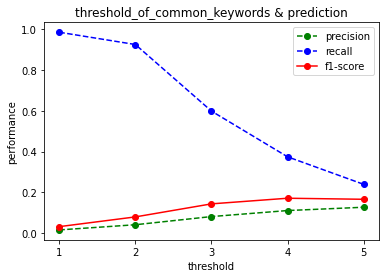

In [58]:
import matplotlib.pyplot as plt

x = ['1', '2', '3', '4', '5']
plt.plot(x, precisions, 'go--', label='precision')
plt.plot(x, recalls, 'bo--', label='recall')
plt.plot(x, fs, 'ro-', label='f1-score')
plt.legend()
plt.xlabel('threshold')
plt.ylabel('performance')
plt.title('threshold_of_common_keywords & prediction')

## find out asymmetric label

In [95]:
# label in "likeid_set" is mutually counted, ex: id_a --> id_b && id_d --> id_a
# we can find out asymmetric label, ex: id_a --> id_b && id_d -!-> id_a

likeid_set = pd.read_csv('./observe/like_title.csv', usecols=['id_text_a', 'id_text_b'])
likeid_tuple = data_train.loc[data_train['label']=='like'][['id_text_a', 'id_text_b']]
likeid_diff = pd.concat([likeid_set, likeid_tuple, likeid_tuple]).drop_duplicates(keep=False)
print ('length difference =', \
       likeid_set.shape[0], '-', likeid_tuple.shape[0], '=', likeid_diff.shape[0])

length difference = 2380 - 1381 = 999


In [96]:
asym = likeid_diff.to_numpy()
asym_ids = []
for i in asym:
    asym_ids.append(tuple(i))

    
new_labels = []
for _, row in data_train.iterrows():
    if row.label == 'unlike' and (row.id_text_a, row.id_text_b) in asym_ids:
            new_labels.append('asymmetric')
    else:
        new_labels.append(row.label)   
        
        
data_train['label_2'] = new_labels

## make observation data.csvm including: like\*1381, asymmetric\*999, unlike\*200

In [98]:
# 比較相關/不相關的article pair, 找出相關性的規則，可以搭配關鍵字使用
from sklearn.utils import shuffle

temp_like = data_train.loc[data_train['label']=='like']
temp_unlike = data_train.loc[data_train['label_2']=='unlike']
temp_unlike = shuffle(temp_unlike).iloc[:200]
temp_asym = data_train.loc[data_train['label_2']=='asymmetric']

observe = pd.concat([temp_like, temp_asym, temp_unlike], axis=0)
observe.to_csv("./observe/three_in_one.csv", index=False)


In [24]:
history

import os
import sys
import numpy as np
import pandas as pd
from mytools import io_data


module_path = os.path.abspath(os.path.join('./mytools/io_data.py'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
table_train = io_data.make_table("./dataTrainComplete")


key_chem = pd.read_excel("./Keywords/02chem.list.xlsx", header=None, index_col=False)
key_crop = pd.read_excel("./Keywords/02crop.list.xlsx", header=None, index_col=False)
key_pest = pd.read_excel("./Keywords/02pest.list.xlsx", header=None, index_col=False)


def make_key_lists(df):
    output = []
    num_cols = df.shape[1]
    for ind, row in df.iterrows():
        temp = [x for x in list(row) if pd.isnull(x) == False]
        temp.sort(key=len, reverse=True)
        output.append(temp)
    output = sorted(output, key=lambda x: len(x[0]), reverse=True)
    return output


# list_chem = make_key_lists(key_chem)
list_crop = make_key_lists(key_crop)
list_pest = make_key_lists(key_pest)
list_temp = lis